## K-means, measures of performance

In this notebook we will switch from using our own code to the KMeans implementation in SKLearn

In [1]:
from sklearn.cluster import KMeans
%pylab inline
import numpy as np
import pandas as pd

from lib.Kmeans_generate_and_analyze import *

Populating the interactive namespace from numpy and matplotlib


## There are three main ways to evaluate the quality of a k-means result
1. Number of labeling errors.
2. Errors in the locations of the centroids.
3. RMSE

### number of labling errors
* Consider a particular data point $\vec{x}$
* We can think of the index $i$ of the closest centroid $\vec{c}_i$ as the preducted label of $\vec{x}$
* In the good case, there is a 1-1 mapping between the true labels and the predicted labels such that most points match.
* **Unrealistic:** Requires knowing the locations of the *True* centers.

### Distance between true centers and Centroids
* We can match each centrer with the closest true centroid.
* In the good case, the distances between each center and it's matched centroid is small (much smaller than the distance between the centers.
* **Unrealistic:** Requires knowing the number and locations of the *True* centers.

### Elbow in the RMSE curve
* The RMSE is the average square distance between a data point and the closest centroid.
* Does not require additional knowledge.
* **The Elbow** if there is a value of $k$ such that the RMSE decreases rapidly below that $k$ and decreases slowly above this $k$, then we can conclude that this value of $k$ is correct, i.e. is equal to the number of true centers.

<img alt="" src="Figs/Elbow.png" style="width:500px" />

## Analyzing KMeans under different settings. 

#### Getting the documentation about `analyze`
Be issuing the command `analyze?`

You recieve the following blurb:
```
Signature: analyze(k, d, n, radius, plotRMSEbsK=True)
Docstring:
Generate k spherical gaussian clusters and analyze the performance of the Kmeans algorithm.
The gaussian are placed at equal angular intervals on a circle of radius "radius" in dimensions 1 and 2.
    Parameters:
       k = number of generated clusters clusters
       d = dimension of embedding space
       n = number of examples per cluster
       radius: the distance of the clusters from the origin (compare to std=1 for each cluster in each dimension)
File:      ..../Section3-Kmeans-dim-reduction/BasicAnalysis/lib/Kmeans_generate_and_analyze.py
Type:      function
```

### A first, very easy case
with 4 clusters and a radius of 4 the clusters are very well separated and KMeans converges to a very good solution.
* The RMSE has a clear elbow at $k=4$. In other words we can identify the number of clusters.

**Measures that require ground truth**  
* There is only one classification mistake (the point with the blck half-circle at the bottom)
* The locations of the centroids found by KMeans (yellow triangles) are very close to the true centers.

mapping of means to true clusters= [2 0 3 1]
classification accuracy=	 [0.99 1.   0.99 1.  ]
error in ocation of centers=	 0.078,0.118,0.065,0.117


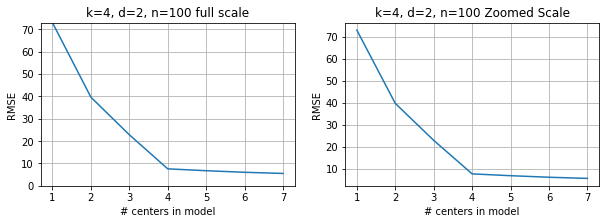

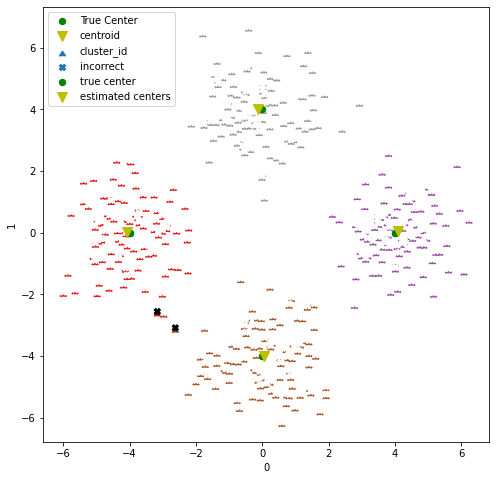

In [2]:
X=analyze(k=4,d=2,n=100,radius=4)

### Decreasing the radius

Decreasing the radius of the circle on which the cluster centers are placed bring the clusters closer together so KMeans has a harder time finding the cluster centers. All measures degrade as the radius is decreased to 3 and then to 2.

mapping of means to true clusters= [1 0 3 2]
classification accuracy=	 [0.98 0.98 0.97 0.98]
error in ocation of centers=	 0.296,0.051,0.022,0.255


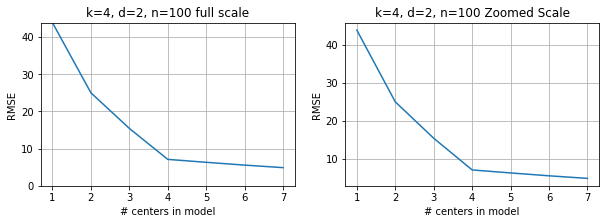

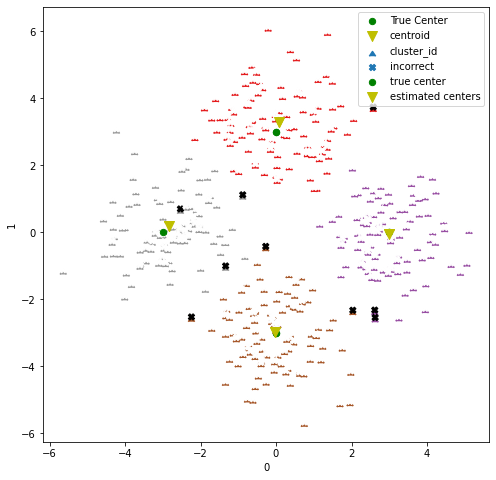

In [3]:
X=analyze(k=4,d=2,n=100,radius=3)

#### When the radius is decreased to 2 even the true centers make mistakes
Recall that the true label is associated with the spherical gaussian that **generated** the point. It might now be the cluster whose center is **closest** to the point

mapping of means to true clusters= [2 0 3 1]
classification accuracy=	 [0.81 0.86 0.88 0.71]
error in ocation of centers=	 0.147,0.031,0.065,0.266


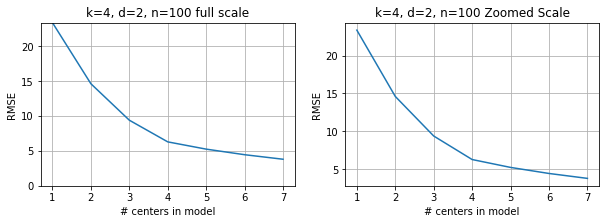

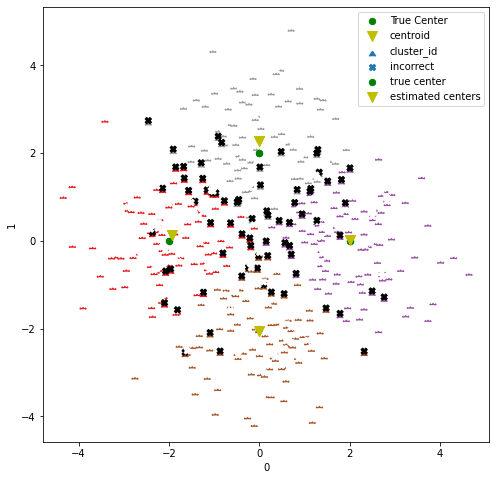

In [4]:
X=analyze(k=4,d=2,n=100,radius=2)

### Reducing the number of points in each cluster
Makes the centroids further from the centers. However if the clusters are sufficiently far from each other (radius =3) this does not hurt the labeling.

mapping of means to true clusters= [0 3 2 1]
classification accuracy=	 [1.   0.97 0.96 0.97]
error in ocation of centers=	 0.200,0.216,0.095,0.143


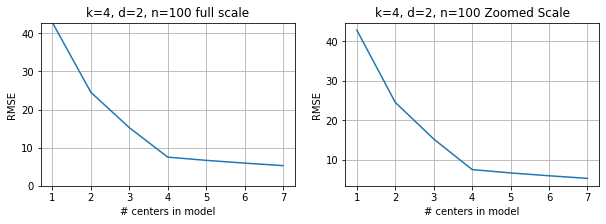

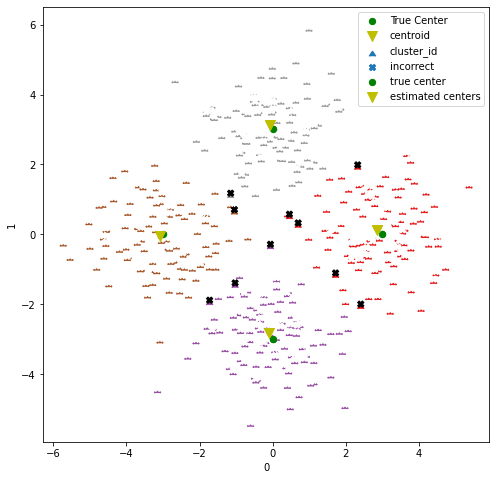

In [5]:
X=analyze(k=4,d=2,n=100,radius=3)

mapping of means to true clusters= [1 2 3 0]
classification accuracy=	 [1.  0.8 1.  1. ]
error in ocation of centers=	 0.721,0.428,0.428,0.705


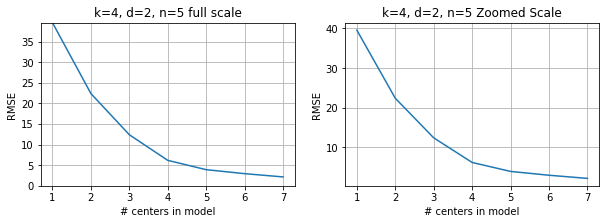

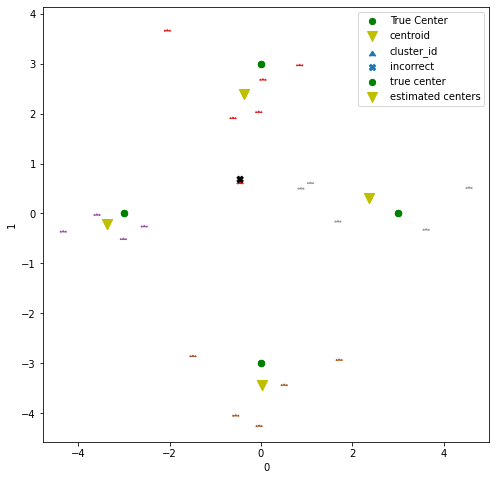

In [6]:
X=analyze(k=4,d=2,n=5,radius=3)

mapping of means to true clusters= [3 1 2 0]
classification accuracy=	 [1. 1. 1. 1.]
error in ocation of centers=	 0.225,0.034,0.100,0.043


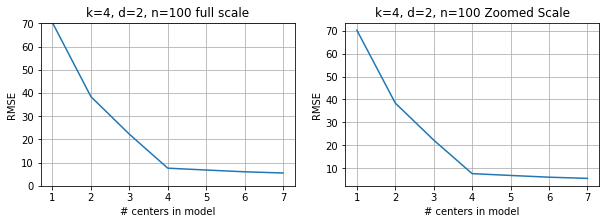

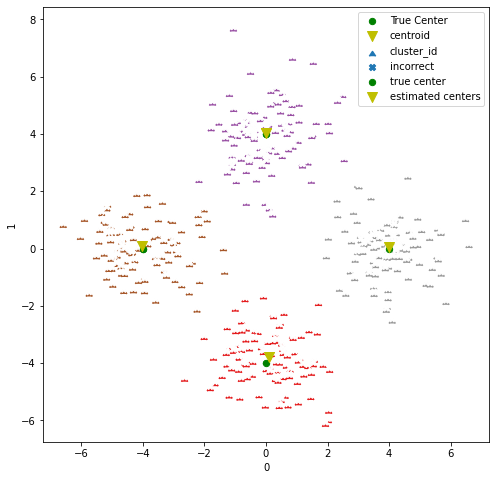

In [7]:
X=analyze(k=4,d=2,n=100,radius=4)

### Increasing the number of clusters
As we increase the number of clusters we create a ring.

mapping of means to true clusters= [4 2 0 3 5 1]
classification accuracy=	 [1.   0.95 0.96 0.94 0.96 0.96]
error in ocation of centers=	 0.104,0.199,0.214,0.149,0.224,0.165


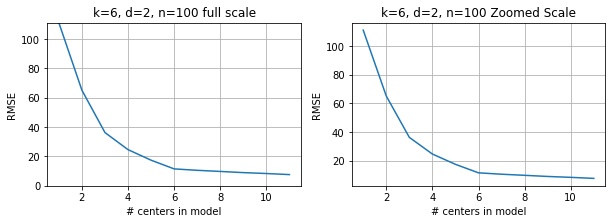

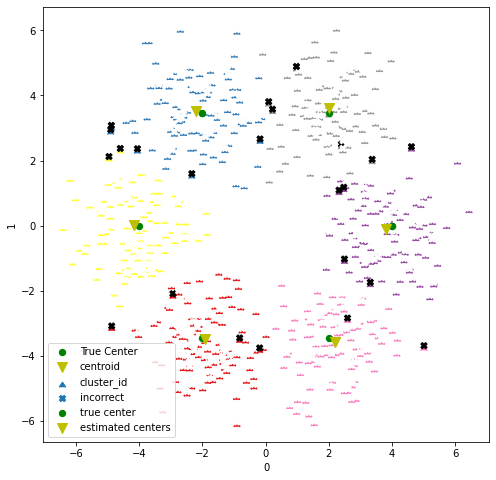

In [8]:
X=analyze(k=6,d=2,n=100,radius=4)

mapping of means to true clusters= [5 1 3 7 2 4 0 6]
classification accuracy=	 [0.84 0.83 0.87 0.8  0.82 0.87 0.91 0.85]
error in ocation of centers=	 0.253,0.391,0.343,0.304,0.300,0.270,0.119,0.274


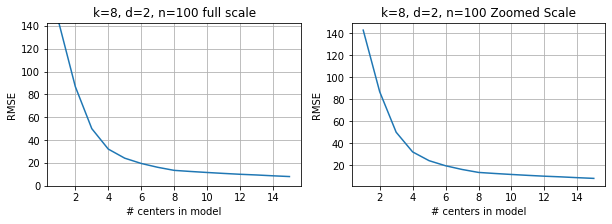

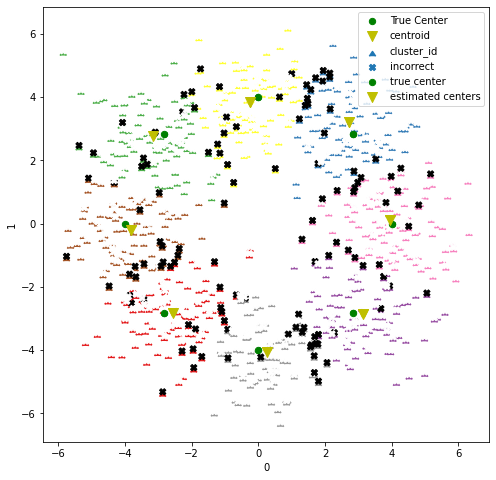

In [9]:
X=analyze(k=8,d=2,n=100,radius=4)

#### Wrong centroids but a good partition
Even if the centroids are in the wrong place, they partition the ring into segments.
* The centers are along a perfect circle
* The centroids are along a distorted circle, but still a circle.

mapping of means to true clusters= [ 8  1 11  6 14  7  5 12  3  0 10 13  2  7 11  1]
classification accuracy=	 [0.67 0.27 0.57 0.43 0.54 0.24 0.45 0.43 0.46 0.49 0.59 0.61 0.61 0.48
 0.24 0.5 ]
error in ocation of centers=	 0.469,1.534,0.454,0.824,0.810,1.506,0.707,0.813,0.796,0.647,0.722,0.652,0.596,0.626,1.420,0.753


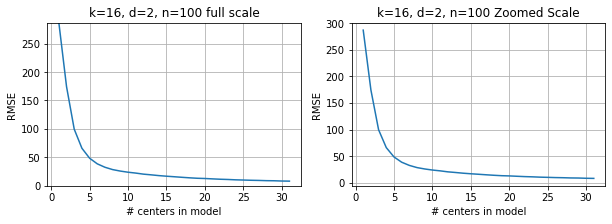

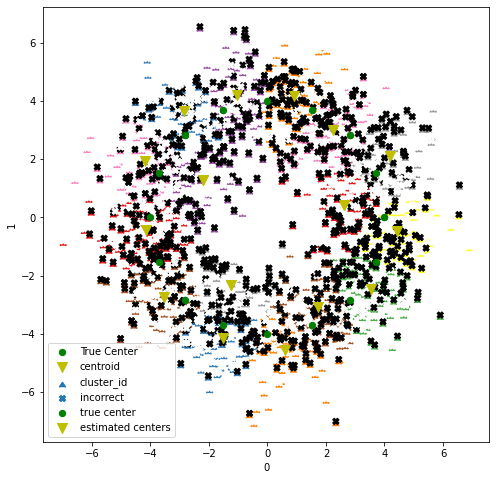

In [10]:
X=analyze(k=16,d=2,n=100,radius=4)

### Vector Quantization
In the last example the clusters ae so close together that the resulting distribution is a more or less uniform ring.

In this case it might be impossible to find the true centers of the clusters.

This is a common situation, especially in the context of coding and lossy compression.

In that case we are just interested in finding a set of centroids, called a **codebook** in this context.

The compression scheme is simple, each vector is represented by the closest centroids. 
* Assuming there are $k$ centroids, we can encode the identity of the centroid using $\log_2 k$ bits.
* On the reciever end, the number $i$ corresponds to the centroid $\vec{c}_i$
* This is called **vector quantization (VQ)**. 
* For an example of using vector quantization to encode colors, see
[this notebook](plot_color_quantization.ipynb)

### Increasing the dimension

The parameter $d$ controls the dimension of the **embedding space**. The centers are still along a circle in 2D. But the spherical gaussians are $d$ dimensional.

We always project on the two first dimensions - in which the centers define a circle.

Strange things happen when the data is high dimensional:
1. The distance between a randomly selected pair of points becomes highly concentrated around one value.
2. The projection in which we see a ring gets harder and harder to find. Most random projections of the data will show a single gaussian.
3. The RMSE decreases with the number of centroids, but only very slowly.
3. KMeans breaks down.

mapping of means to true clusters= [0 3 2 1]
classification accuracy=	 [0.812 0.886 0.808 0.866]
error in ocation of centers=	 0.201,0.016,0.246,0.077


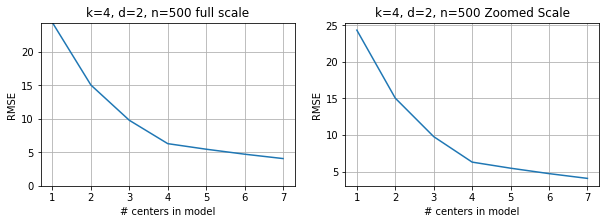

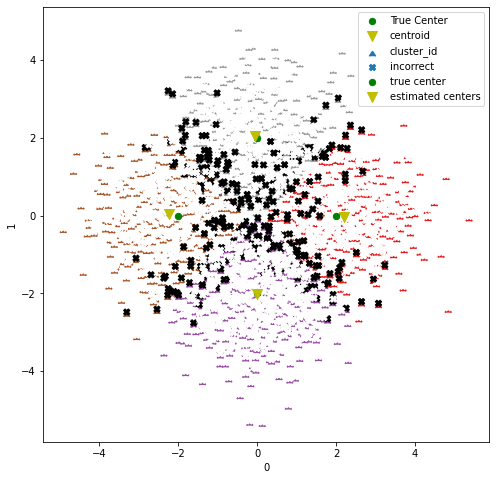

In [11]:
X=analyze(k=4,d=2,n=500,radius=2)

#### Note the difference between zoomed and unzoomed scales
As we increase the dimenssion, the RMSE changezs less and less with the increase in K.

mapping of means to true clusters= [2 0 3 1]
classification accuracy=	 [0.866 0.848 0.852 0.866]
error in ocation of centers=	 0.238,0.260,0.257,0.239


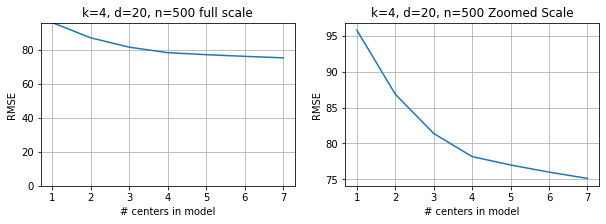

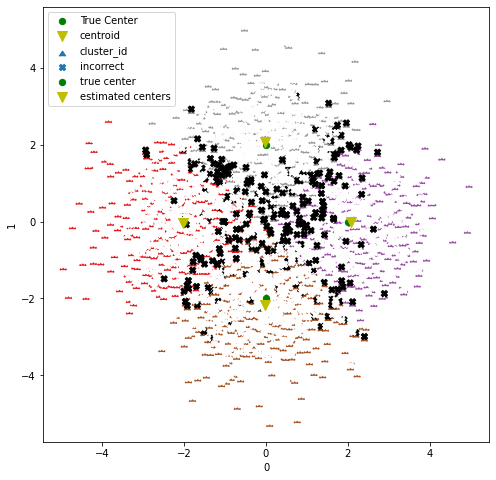

In [12]:
analyze(k=4,d=20,n=500,radius=2);

#### When the dimension is larger than the  number of examples there is no hope
The centroids have no relation to the centers or to the plane in which they lie.

Performance is very close to the performance if all the points were from a single spheical gaussian.

mapping of means to true clusters= [2 3 1 1]
classification accuracy=	 [0.7        0.76666667 0.26666667 0.56666667]
error in ocation of centers=	 1.877,1.504,3.201,2.125


/opt/conda/lib/python3.6/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


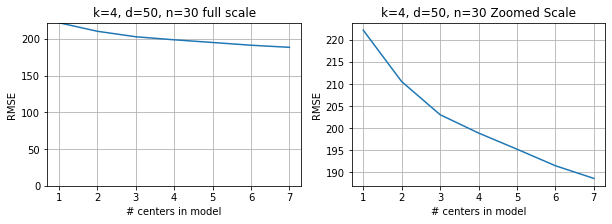

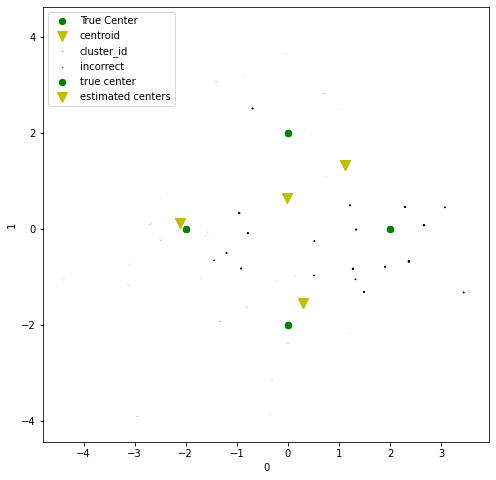

In [14]:
analyze(k=4,d=50,n=30,radius=2);

## Summary
* Performance of KMeans can be measured in various ways, but most require knowledge of the ground truth.
* The main measure that does not require ground truth is the behaviour of the RMSE.
  * We used it to estimate the number of centers. Can you think how to use it to estimate whether a particular centroid is in the location of the underlying centroid?

### Some experiments we did:
* Making the clusters closer makes the clustering problem harder.
* Decreasing the number of examples per cluster increases the error in the centroids, but it might not hurt the labeling error.
* Increasing the number of clusters makes the distribution into a ring. K-means will find a good partition along the ring, but not necessarily the the one iduced by the original centers.
* High dimensions breaks KMeans. The RMSE decreases very slowly with K.

##  See you next time!